In [114]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set()

In [2]:
# este es un analisis del dataset 'nations' que contiene informacion sobre diferentes atributos del desarrollo humano
# en 194 paises, recolectados por las naciones unidas

* Contiene información a nivel mundial sobre demografía:
    * `country`: País.
    * `region`: Continente del país.
    * `gdp`: Producto Interno Bruto per cápita, precios 2005.
    * `school`: Promedio años de escolaridad.
    * `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    * `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
    * `life`: Esperanza de vida al nacer.
    * `pop`: Población total.
    * `urban`: Porcentaje de población urbana.
    * `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
    * `literacy`: Tasa de alfabetismo.
    * `co2`: Toneladas de Co2 emitidas per cápita.
    * `gini`: Coeficiente de desigualdad del ingreso.

In [3]:
# obtenemos el dataset

df_nations= pd.read_csv("https://raw.githubusercontent.com/DireccionAcademicaADL/Nations-DB/main/nations.csv", encoding="ISO-8859-1")

In [4]:
# descargamos el dataset en nuestro disco local para tener una copia de respaldo

# df_nations.to_csv("C:/Users/usuario/Desktop/Datascience/Introduccion al analisis de datos con Python/nations.csv")

In [5]:
df_nations.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [6]:
# info general sobre el dataframe
df_nations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    int64  
 1   country     194 non-null    object 
 2   region      194 non-null    object 
 3   gdp         179 non-null    float64
 4   school      188 non-null    float64
 5   adfert      194 non-null    float64
 6   chldmort    193 non-null    float64
 7   life        194 non-null    float64
 8   pop         194 non-null    int64  
 9   urban       194 non-null    float64
 10  femlab      177 non-null    float64
 11  literacy    135 non-null    float64
 12  co2         185 non-null    float64
 13  gini        81 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 21.3+ KB


In [7]:
# dimensiones del dataframe
df_nations.shape

(194, 14)

In [8]:
# valores null/nan presentes en el dataframe
df_nations.isnull().sum()

Unnamed: 0      0
country         0
region          0
gdp            15
school          6
adfert          0
chldmort        1
life            0
pop             0
urban           0
femlab         17
literacy       59
co2             9
gini          113
dtype: int64

In [9]:
# el dataframe cuenta con 194 registros, y en los campos gini y literacy hay faltante en un gran porcentaje de estos(119 en gini, 59 en literacy)
# lo que nos dificulara el llegar a conclusiones sustentables y veridicas en el caso de utilizar dichas columnas en el analisis
# por lo que lo mas recomendable es no utilizar esos campos en el analisis del dataframe.

In [10]:
faltantes_gini= df_nations['gini'].isnull().sum()/len(df_nations)
faltantes_gini
# el porcentaje de datos faltantes en el campo gini supera el 58% 

0.5824742268041238

In [11]:
faltantes_literacy= df_nations['literacy'].isnull().sum()/len(df_nations)
faltantes_literacy
# el porcentaje de datos faltantes en el campo literacy es del 30%

0.30412371134020616

In [12]:
# tipos de datos de cada columna en el dataframe
df_nations.dtypes

Unnamed: 0      int64
country        object
region         object
gdp           float64
school        float64
adfert        float64
chldmort      float64
life          float64
pop             int64
urban         float64
femlab        float64
literacy      float64
co2           float64
gini          float64
dtype: object

In [13]:
# eliminamos las columnas que no son necesarias o que cuentan con un alto porcentaje de datos faltante o nulos
# df_nations= df_nations.drop(columns= 'Unnamed: 0', inplace= True)


In [14]:
# buscamos registros/filas repetidas en nuestro dataframe
df_nations.duplicated().sum()

0

In [15]:
# creamos un nuevo dataframe con las columnas a trabajar, para tener la copia original como respaldo
df= df_nations.drop(columns= ['Unnamed: 0', 'gini', 'literacy'])

In [16]:
# formateamos el nombre de los campos
for campo in df.columns:
    df= df.rename(columns= {campo:campo.title()})

1. cual es el valor promedio de gdp en el dataset?
2. cual es el valor mas bajo de alfabetismo en nuestro dataset?

### 1-

In [17]:
# obtenemos el valor promedio de gdp del dataset
gdp_promedio= df['Gdp'].mean()
print(f'El valor promedio del campo Gdp(Producto Interno Bruto per cápita) es ${gdp_promedio} U$D')

El valor promedio del campo Gdp(Producto Interno Bruto per cápita) es $12118.739193367559 U$D


### 2-

In [18]:
# obtenemos el valor minimo del campo literacy del dataset
alfabetismo_min= df_nations['literacy'].min()
print('Pais con la tasa de alfabetismo mas baja:')
df_nations[df_nations['literacy'] == alfabetismo_min].drop(columns= ['Unnamed: 0'])

Pais con la tasa de alfabetismo mas baja:


,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
3,Burkina Faso,Africa,1063.400024,1.3,124.800003,170.5,53.783333,15308383,23.583334,0.8584,23.6,0.2,NaN


1. ¿Qué tipos de atributos nos encontramos en el dataset?
2. ¿Cuántos datos tenemos en cada región?
3. ¿Cuántos países tienen índices de CO_2 mayores que el promedio?
4. ¿Que se puede decir del alfabetismo en áfrica o europa?

### 1-

In [19]:
# tipos de atributos(campos) presentes en el dataframe
df.dtypes

Country      object
Region       object
Gdp         float64
School      float64
Adfert      float64
Chldmort    float64
Life        float64
Pop           int64
Urban       float64
Femlab      float64
Co2         float64
dtype: object

### 2-

In [20]:
# datos presentes por region

datos_por_region= df.groupby(by= ['Region']).count()
registros_por_region= df['Region'].value_counts()
datos_por_region

,Country,Gdp,School,Adfert,Chldmort,Life,Pop,Urban,Femlab,Co2
Region,,,,,,,,,,
Africa,52,50,51,52,52,52,52,52,51,51
Americas,35,33,35,35,35,35,35,35,31,35
Asia,49,46,48,49,48,49,49,49,49,49
Europe,43,39,41,43,43,43,43,43,37,37
Oceania,15,11,13,15,15,15,15,15,9,13


In [21]:
# registros presentes por region
registros_por_region


# recordemos que nuestro campo/columna region no presenta valores nulos

Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: Region, dtype: int64

### 3-

In [22]:
# primero obtenemos la sumatoria total de emisiones co2 del dataframe
sum_co2= df['Co2'].sum()

# obtenemos la cantidad de paises encuestados(recordemos que el campo paises no presenta valores nulos)

# paises= df['Country'].value_counts()
cant_paises= len(set(df['Country']))

# sacamos el promedio general de emisiones co2 de nuestro dataframe y realizamos la comparacion de esta cantidad de emisiones con el valor de emisiones de cada pais en particular
prom_co2= sum_co2/cant_paises
superan_prom_co2= df[df.Co2 > prom_co2]

# paises que superan el promedio de emisiones co2
superan_prom_co2

,Country,Region,Gdp,School,Adfert,Chldmort,Life,Pop,Urban,Femlab,Co2
15,Equatorial Guinea,Africa,27645.800781,5.400000,122.900002,149.50,50.066666,653533,39.266666,0.4140,32.550003
26,Libya,Africa,14497.799805,6.816667,3.200000,19.75,74.016663,6075651,77.433334,0.3096,33.849998
40,Seychelles,Africa,18625.800781,9.400000,51.299999,12.75,72.983330,85167,54.066666,NaN,30.799999
43,South Africa,Africa,9175.400391,8.350000,59.200001,68.75,51.433334,49028316,60.483334,0.7406,31.400000
52,Antigua and Barbuda,Americas,17676.400391,8.900000,55.500000,13.00,72.166664,86367,30.466667,NaN,18.299999
...,...,...,...,...,...,...,...,...,...,...,...
178,United Kingdom,Europe,33295.800781,9.066667,29.600000,6.00,79.550003,61099184,79.316666,0.7916,34.099998
180,Australia,Oceania,33707.199219,11.983334,16.500000,5.25,81.400002,21325382,88.666664,0.7994,66.199997
185,Nauru,Oceania,NaN,NaN,31.200001,45.50,79.466667,10183,100.000000,NaN,51.849998
186,New Zealand,Oceania,25199.599609,12.366667,30.900000,6.25,80.083336,4253334,86.133331,0.8118,26.950001


In [23]:
# otra forma

mayor_al_promedio_co2= np.where(df['Co2'] > np.mean(df['Co2'].dropna()))
df.iloc[mayor_al_promedio_co2]

,Country,Region,Gdp,School,Adfert,Chldmort,Life,Pop,Urban,Femlab,Co2
15,Equatorial Guinea,Africa,27645.800781,5.400000,122.900002,149.50,50.066666,653533,39.266666,0.4140,32.550003
26,Libya,Africa,14497.799805,6.816667,3.200000,19.75,74.016663,6075651,77.433334,0.3096,33.849998
40,Seychelles,Africa,18625.800781,9.400000,51.299999,12.75,72.983330,85167,54.066666,NaN,30.799999
43,South Africa,Africa,9175.400391,8.350000,59.200001,68.75,51.433334,49028316,60.483334,0.7406,31.400000
52,Antigua and Barbuda,Americas,17676.400391,8.900000,55.500000,13.00,72.166664,86367,30.466667,NaN,18.299999
...,...,...,...,...,...,...,...,...,...,...,...
178,United Kingdom,Europe,33295.800781,9.066667,29.600000,6.00,79.550003,61099184,79.316666,0.7916,34.099998
180,Australia,Oceania,33707.199219,11.983334,16.500000,5.25,81.400002,21325382,88.666664,0.7994,66.199997
185,Nauru,Oceania,NaN,NaN,31.200001,45.50,79.466667,10183,100.000000,NaN,51.849998
186,New Zealand,Oceania,25199.599609,12.366667,30.900000,6.25,80.083336,4253334,86.133331,0.8118,26.950001


In [24]:
print(f'El {round((len(df.iloc[mayor_al_promedio_co2])/len(df))*100,2)}% de los paises del dataset presentan emisiones co2 mayores a la media')

El 32.99% de los paises del dataset presentan emisiones co2 mayores a la media


In [25]:
print(f'Cantidad de paises con emisiones de co2 mayores al promedio: {len(df.iloc[mayor_al_promedio_co2])}')

Cantidad de paises con emisiones de co2 mayores al promedio: 64


### 4-

In [50]:
# en este caso debemos utilizar el dataframe df_nations, ya que el campo literacy lo desechamos de nuestro analisis al tener demasiados valores Nan
# los valores del campo literacy (tasa de alfabetismo), debemos averiguar si alfabetismo entendido como estudios primarios y secundarios completos, o cual es el umbral para medir este estadistico.
temp= df_nations.drop(columns= ['Unnamed: 0', 'gini'])
temp= temp.groupby(['region'])
africa= temp.get_group('Africa').drop(columns= 'region')
europa= temp.get_group('Europe').drop(columns= 'region')



,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.000000
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.200000
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.200000
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.200000
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.100000
52,Antigua and Barbuda,Americas,17676.400391,8.900000,55.500000,13.00,72.166664,86367,30.466667,NaN,99.000000,18.299999
53,Argentina,Americas,12274.000000,9.083333,56.900002,15.25,75.283333,39543736,91.900002,0.6544,97.699997,15.650000
54,Bahamas,Americas,NaN,8.500000,31.799999,13.75,74.599998,331233,83.599998,0.8656,NaN,23.950001
55,Barbados,Americas,19189.000000,9.250000,42.599998,11.50,76.300003,271917,42.900002,0.8430,NaN,16.650000
56,Belize,Americas,6208.799805,7.850000,78.699997,19.75,75.216667,296200,51.200001,0.5674,NaN,10.750000


In [27]:
# creamos un dataframe de comparacion de estadisticos en base a la variable 'literacy'(tasa de alfabetizacion), para las regiones de africa y europa
alfabetismo_afr_eur= temp['literacy'].describe().loc[['Africa', 'Europe']]
print('Estadisticos sobre la Alfabetizacion por Region (para Africa y Europa)')
alfabetismo_afr_eur


Estadisticos sobre la Alfabetizacion por Region (para Africa y Europa)


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Africa,47.0,65.308511,19.704853,23.600000,55.150000,66.800003,84.450001,93.300003
Europe,22.0,98.177273,1.864437,92.400002,97.699997,98.650002,99.674997,99.800003


Podemos sacar diversas conclusiones en base a la comparacion de estadisticos sobre la tasa de alfabetizacion de las 2 regiones:

* Existe una alta tasa de alfabetizacion en la region europea (mas del 98% en promedio) y es muy homogenea en relacion a toda la region(la tasa mas baja para un pais corresponde al 92%)
* En contrapartida, aunque la region africana presenta una tasa del 65% de alfabetizacion, su variabilidad en cada pais es muy pronunciada (yendo desde un porcentaje minimo del 23% de alfabetizacion hasta un 93%) 
* Estas conclusiones estan avaladas por sus desviaciones estandar en cada region(mas de 19.7 en africa, menos de 2 en europa), podemos decir que en la region europea, practicamente todas las personas(9.8 de cada 10) son alfabetas (cuentan con una educacion basica, saben leer y escribir, o tuvieron acceso a educacion primaria y secundaria comom minimo), en cambio, en la region africana 6.5 de cada 10 personas son alfabetas y eso puede variar drasticamente en el pais donde estemos.


# Visualizacion 

C:\Users\usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


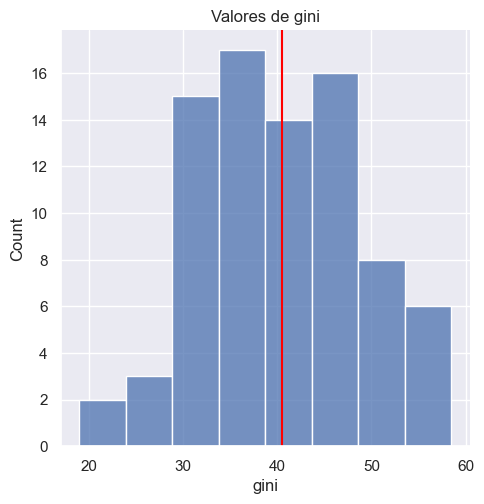

In [28]:
# construimos un histograma basado en la distribucion de frecuencias de los valores gini
sns.displot(df_nations['gini'], kind= 'hist')
plt.axvline(df_nations['gini'].mean(), color= 'red')  ## esta linea de codigo traza una linea vertical en el grafico, que representa el valor medio de la variable
plt.title('Valores de gini')
plt.show()

In [29]:
# agrupamos los valores pertenecientes a las regiones de africa y europa
africa= df[df['Region'] == 'Africa']
europa= df[df['Region'] == 'Europe']

In [65]:
regiones= list(df.Region.value_counts().index)
regiones

segmentacion_regiones= {}

for region in regiones:
    segmentacion_regiones.setdefault(region, df[df['Region'] == region])



In [30]:
df.columns

Index(['Country', 'Region', 'Gdp', 'School', 'Adfert', 'Chldmort', 'Life',
       'Pop', 'Urban', 'Femlab', 'Co2'],
      dtype='object')

In [37]:
# obtenemos el promedio general para los paises de las regiones de africa y europa de la tasa de mortalidad infantil
media_europa= europa['Chldmort'].mean()
media_africa= africa['Chldmort'].mean()


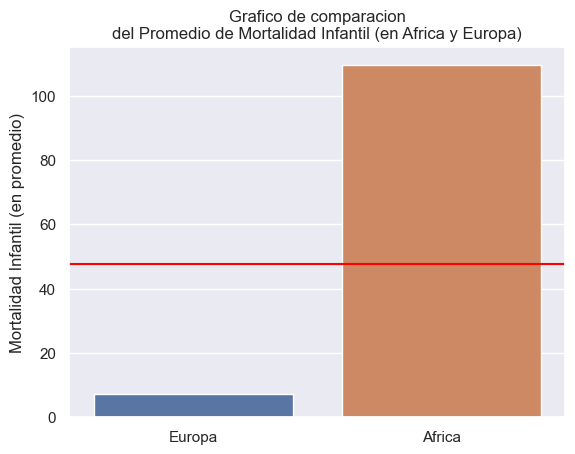

In [47]:
# realizaos un grafico de barras donde plotemos la tasa de mortalidad infantil en las regiones de africa y europa, para realizar una comparacion entre ellas.
sns.barplot(x= ['Europa', 'Africa'], y= [media_europa,media_africa])
plt.title('Grafico de comparacion\ndel Promedio de Mortalidad Infantil (en Africa y Europa)')
plt.ylabel('Mortalidad Infantil (en promedio)')
plt.axhline(df['Chldmort'].mean(), color= 'red')  ## esta linea de codigo traza una linea en el grafico que representa el valor promedio general del dataset de la tasa de mortalidad infantil.
plt.show()

In [88]:
# Tasa de alfabetizacion de America comparada al resto del mundo

alf_america= df_nations[df_nations['region'] == 'Americas']['literacy'].mean()
alf_resto= df_nations[df_nations['region'] != 'Americas']['literacy'].mean()


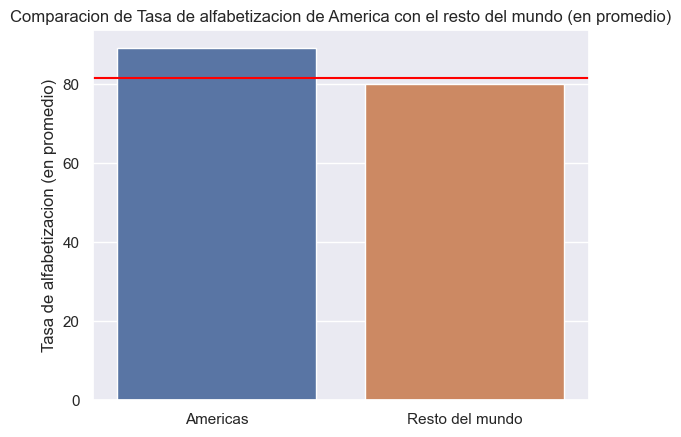

In [90]:
sns.barplot(x= ['Americas', 'Resto del mundo'], y= [alf_america,alf_resto])
plt.title('Comparacion de Tasa de alfabetizacion de America con el Resto del mundo (en promedio)')
plt.ylabel('Tasa de alfabetizacion (en promedio)')
plt.axhline(df_nations['literacy'].mean(), color= 'red')  ## esta linea de codigo traza una linea en el grafico que representa el valor promedio general del dataset de la tasa de alfabetizacion.
plt.show()

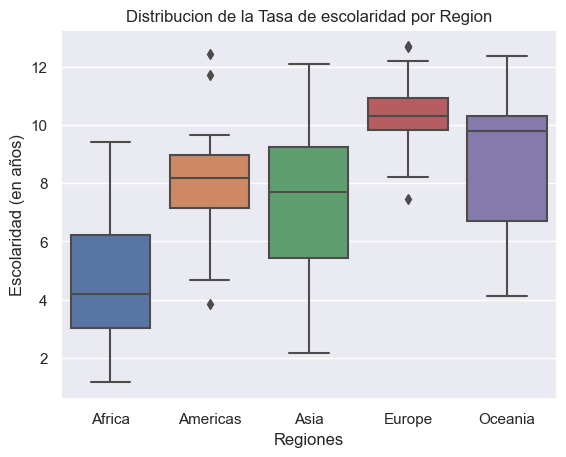

In [94]:
# tasa de escolaridad por regiones

sns.boxplot(x= df['Region'], y= df['School'])
plt.title('Distribucion de la Tasa de escolaridad por Region')
plt.xlabel('Regiones')
plt.ylabel('Escolaridad (en años)')
plt.show()

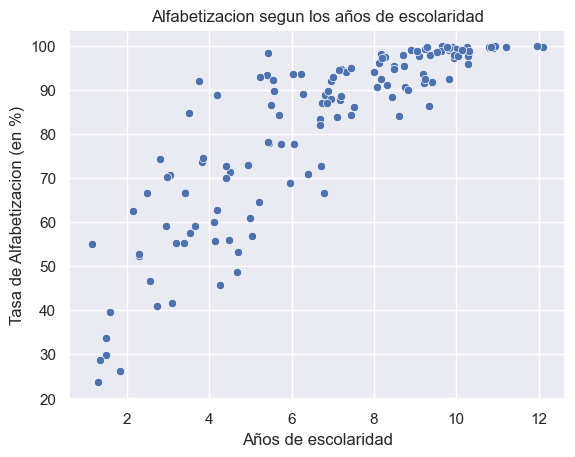

In [96]:
# graficamos la relacion entre las variables escolaridad y alfabetizacion

# primero separamos esas columnas del dataframe y las limpiamos de valores nan
temp= df_nations[['school', 'literacy']].dropna()

# ahora si graficamos
sns.scatterplot(x=temp['school'] , y= temp['literacy'])
plt.title('Alfabetizacion segun los años de escolaridad')
plt.xlabel('Años de escolaridad')
plt.ylabel('Tasa de Alfabetizacion (en %)')
plt.show()

In [98]:
# sacamos la correlacion entre ambas variables
temp.corr()

# esto nos muestra que existe una correlacion positiva entre la escolaridad y la tasa de alfabetizacion, es decir
# a mayor cantidad de años de escolaridad, mayor tasa de alfabetizacion.

,school,literacy
school,1.00000,0.85491
literacy,0.85491,1.00000


In [99]:
df.columns

Index(['Country', 'Region', 'Gdp', 'School', 'Adfert', 'Chldmort', 'Life',
       'Pop', 'Urban', 'Femlab', 'Co2'],
      dtype='object')

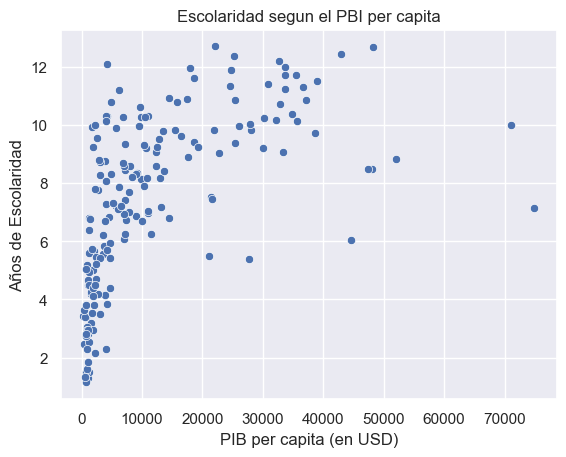

In [101]:
# relacion entre escolaridad y gdp (producto bruto interno per capita).

# separamos los campos de interes y los limpiamos de valores nan

temp= df_nations[['school', 'gdp']].dropna()

# ahora si graficamos
sns.scatterplot(x=temp['gdp'] , y= temp['school'])
plt.title('Escolaridad segun el PBI per capita')
plt.ylabel('Años de Escolaridad')
plt.xlabel('PIB per capita (en USD)')
plt.show()


In [102]:
# obtenemos la correlacion entre los campos
temp.corr()

# como vemos, no existe una correlacion lineal clara entre el PBI per capita y la escolaridad

,school,gdp
school,1.00000,0.57328
gdp,0.57328,1.00000


In [104]:
df_nations.columns

Index(['Unnamed: 0', 'country', 'region', 'gdp', 'school', 'adfert',
       'chldmort', 'life', 'pop', 'urban', 'femlab', 'literacy', 'co2',
       'gini'],
      dtype='object')

In [105]:
# creamos una tabla de correlaciones de nuestro dataframe
correlaciones= df_nations.drop(columns= ['Unnamed: 0', 'country', 'region']).corr()

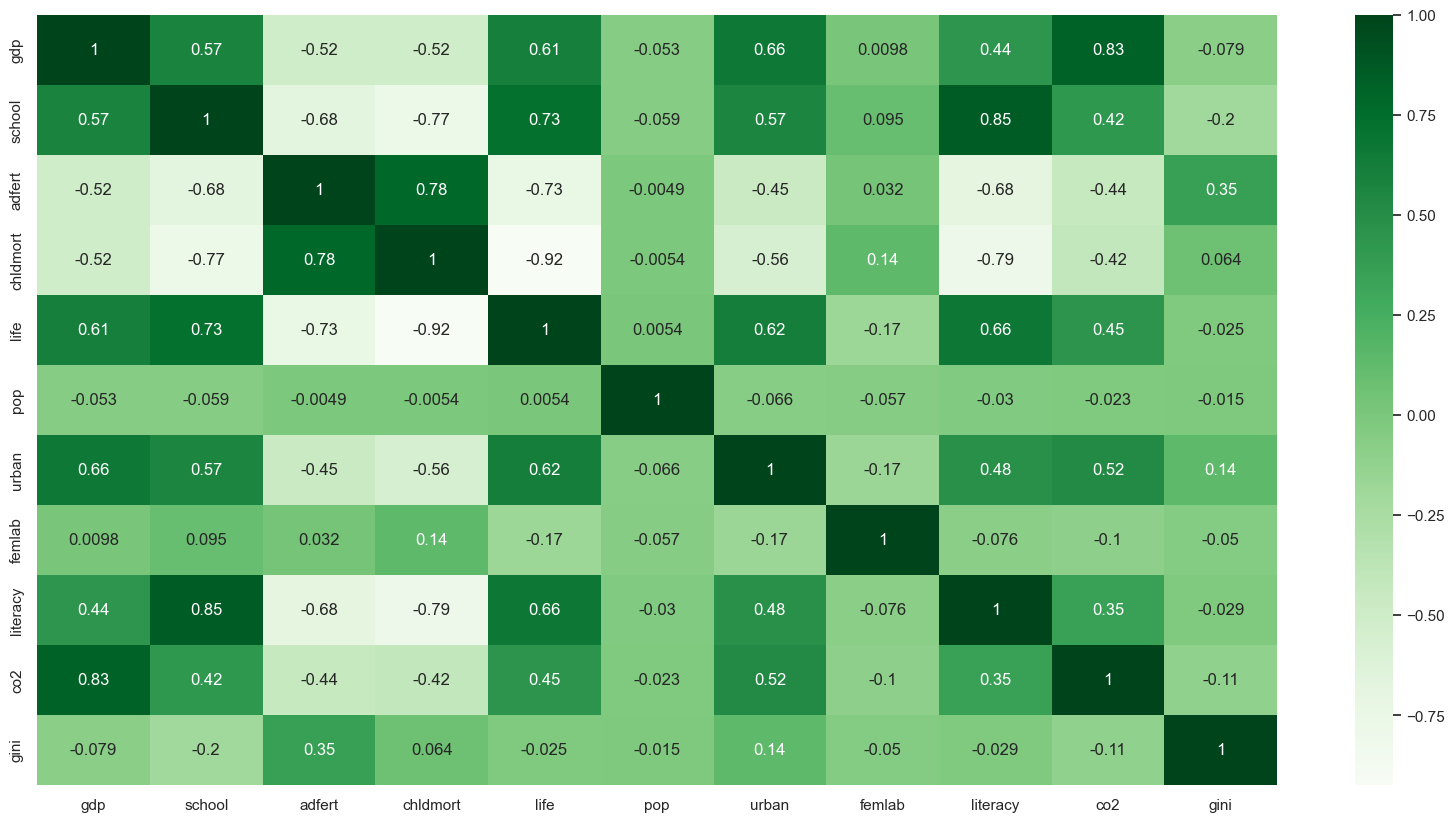

In [106]:
# graficamos las correlaciones entre variables

plt.figure(figsize= (20,10))
sns.heatmap(correlaciones, cmap= 'Greens', annot= True)
plt.title('Grafico de correlaciones entre variables')
plt.show()

# cuanto mas oscuro es el color, mayor es la correlacion positiva/directa, cuanto mas claro es el color, mayor es nuestra correlacion negativa/inversa, un verde intermedio nos
# indica la falta de correlacion entre variables

# Modelado

In [107]:
# aplicamos un modelo de regresion lineal


In [ ]:
# plantemos el modelo con su pregunta
# Cual es la relacion entre las emiciones co2 y el PBI?

In [109]:
# para modelar, debemos pasar datos sin valores nan
data_limpia= df_nations.dropna()

In [116]:
modelo1= smf.ols('gdp ~ co2', data= data_limpia).fit()

In [117]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     470.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.59e-32
Time:                        09:18:00   Log-Likelihood:                -677.72
No. Observations:                  71   AIC:                             1359.
Df Residuals:                      69   BIC:                             1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2791.2666    448.368      6.225      0.000    1896.797    3685.737
co2          343.9784     15.860     21.688      0.000     312.338     375.619
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.423
Skew:                           0.785   Prob(JB):                       0.0244
Kurtosis:                       3.217   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""